
# Data Preparation and Modelling

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\data\\processed\\cleaned_data.csv")

In [3]:
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42044,41006.0,-1.251860,0.696168,1.052709,-0.160757,0.702383,1.835033,-0.151356,1.189553,-0.486057,-0.731654,1.387979,1.273986,-0.139755,0.432552,-0.043570,-1.271310,1.061741,-1.828229,-0.761470,-0.044636,0.031122,0.247048,0.010852,-1.307093,-0.287764,0.370414,0.258820,0.055051,22.6,0
88755,62414.0,1.038212,-0.247957,0.219272,0.962050,-0.127937,0.575722,-0.349189,0.309183,0.239668,0.192184,0.394235,-0.297176,-1.608805,0.720377,0.946225,0.589537,-0.753085,0.737626,-0.365812,-0.080667,0.217478,0.429574,-0.261740,-0.866266,0.544858,-0.158382,0.020498,0.014884,82.1,0
111760,72553.0,1.153862,0.559349,-0.248440,1.146834,0.261252,-0.404537,0.106668,0.049494,-0.323419,-0.436876,1.934803,0.643305,-0.275673,-0.799768,0.626042,0.415479,0.707834,0.530590,-0.649802,-0.135196,0.025546,0.136131,-0.100799,-0.094530,0.584075,-0.314679,0.043635,0.037334,1.0,0


In [4]:
df.shape

(283726, 31)

#### 1 Correlation_Matrix

In [5]:
# Correlation between the variables
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


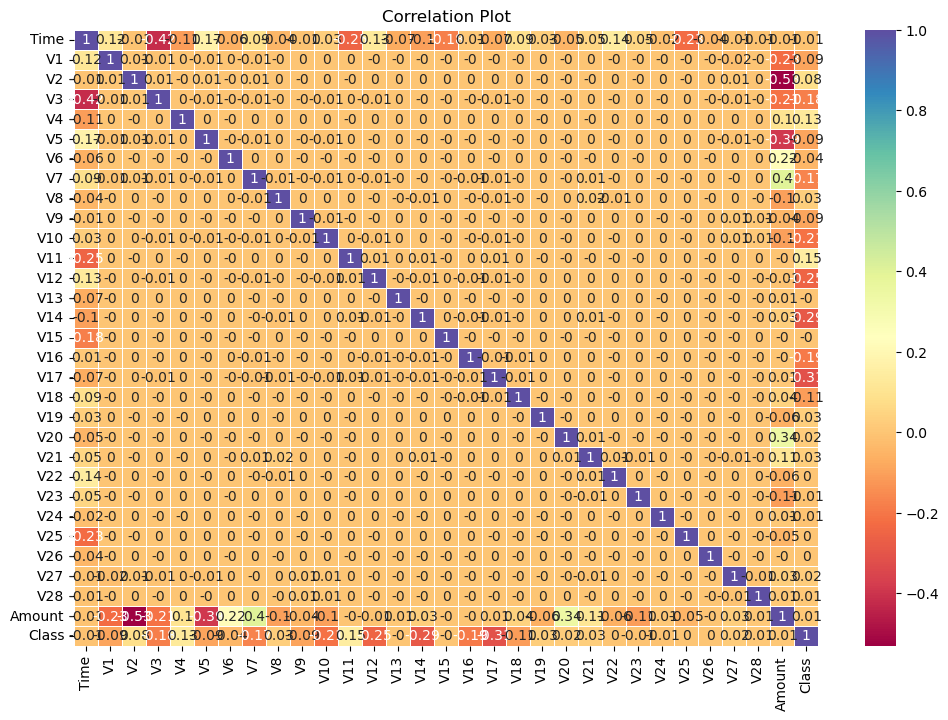

In [6]:
# let's plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2), cmap="Spectral", annot=True, linewidths=0.5)
plt.title("Correlation Plot")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\reports\\figures\\6.0 Correlation_plot.jpg")
plt.show()

We don't get that much clarity from the above plot so we have to specific correlation with the target variable using the barplot

In [7]:
df2 = df.drop("Class", axis = 1)

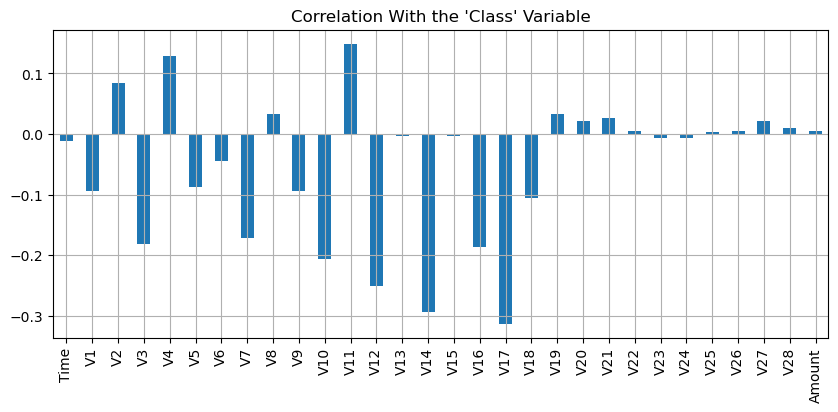

In [8]:
# Bar Plot Correlation
plt.figure(figsize=(10,4))
df2.corrwith(df.Class).plot.bar(grid = True)
plt.title("Correlation With the 'Class' Variable")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\reports\\figures\\7.0 Correlation With the Class Variable.jpg")
plt.show()

#### 2. Data Splitting

In [9]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop("Class",axis = 1)
y = df.Class

In [11]:
x.shape

(283726, 30)

In [12]:
y.shape

(283726,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [14]:
x_train.shape

(255353, 30)

In [15]:
x_test.shape

(28373, 30)

In [16]:
y_train.shape

(255353,)

In [17]:
y_test.shape

(28373,)

#### 3. Feature Scalling

In [18]:
# importing the necessary libraries
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler

StandardScaler()

In [21]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
x_train.round(2)

array([[-0.15,  1.09, -0.01, ..., -0.44, -0.25, -0.31],
       [ 1.2 , -2.78, -0.68, ...,  0.76,  1.44,  0.74],
       [-0.94, -0.95,  0.21, ..., -0.98,  0.49,  0.27],
       ...,
       [-0.31,  0.64, -0.03, ...,  0.11,  0.08, -0.33],
       [-0.13,  1.02, -0.08, ..., -0.19, -0.17, -0.19],
       [-0.38, -0.24,  0.5 , ..., -0.34, -0.15, -0.35]])

In [23]:
x_test.round(2)

array([[-0.54,  0.54, -0.46, ...,  0.25,  0.12, -0.13],
       [-0.3 , -2.47,  2.64, ...,  1.09, -1.34, -0.31],
       [-1.13, -0.8 , -0.16, ..., -1.27, -0.76, -0.17],
       ...,
       [-1.8 ,  0.6 , -0.09, ..., -0.06, -0.  , -0.35],
       [ 1.27,  0.99, -1.27, ..., -0.05, -0.1 ,  0.38],
       [-0.19, -0.34,  0.8 , ...,  0.3 ,  0.06, -0.31]])

#### 4. Model_Building

##### 1. Logistic Regression

In [24]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report

In [25]:
lrm = LogisticRegression()

In [26]:
lrm

LogisticRegression()

In [27]:
# model_trianing
lrm.fit(x_train,y_train)

LogisticRegression()

In [28]:
# prediction
prediction = lrm.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
my_dic = {"actual":y_test, "Prediction":prediction}
pd.DataFrame(my_dic)

,actual,Prediction
104279,0,0
133849,0,0
42456,0,0
875,0,0
262310,0,0
...,...,...
282426,0,0
167962,0,0
6980,0,0
250110,0,0


In [30]:
acc = accuracy_score(y_test,prediction)
pre = precision_score(y_test,prediction)
rec = recall_score(y_test,prediction)
f1 = f1_score(y_test,prediction)

In [54]:
lrdf = pd.DataFrame([acc,pre,rec,f1], columns=["logistic_regression"], index = ["accuracy","precision","recall","f1_score"] )
lrdf

,logistic_regression
accuracy,0.999260
precision,0.862069
recall,0.595238
f1_score,0.704225


In [32]:
# classification report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28331
           1       0.86      0.60      0.70        42

    accuracy                           1.00     28373
   macro avg       0.93      0.80      0.85     28373
weighted avg       1.00      1.00      1.00     28373



In [33]:
# confusion matrix
confusion_matrix(y_test,prediction)

array([[28327,     4],
       [   17,    25]], dtype=int64)

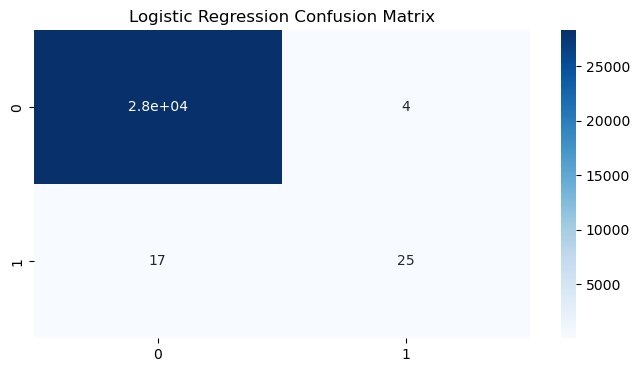

In [34]:
# confusion matrix plot
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,prediction).round(),annot=True,cmap = "Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\reports\\figures\\8.0 Logistic Regression Confusion Matrix.jpg")
plt.show()

In [35]:
# Let's save the LOGISTIC regression model
import joblib
joblib.dump(lrm, "C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\models\\1.0 Logistic regression model.pkl ")

['C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\models\\1.0 Logistic regression model.pkl ']

##### 2. Random Forest Classifier

In [37]:
# importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [38]:
rfc = RandomForestClassifier()

In [39]:
rfc

RandomForestClassifier()

In [40]:
# model building
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
# Prediction using the random forest algorithm
prediction_rm = rfc.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
my_dicrm = {"actual":y_test, "prediction":prediction_rm}
pd.DataFrame(my_dicrm)

,actual,prediction
104279,0,0
133849,0,0
42456,0,0
875,0,0
262310,0,0
...,...,...
282426,0,0
167962,0,0
6980,0,0
250110,0,0


In [44]:
# let's perform model evaluation
accu = accuracy_score(y_test,prediction_rm)
prec = precision_score(y_test,prediction_rm)
f1_sc = f1_score(y_test,prediction_rm)
recal = recall_score(y_test,prediction_rm)

In [52]:
rfdf = pd.DataFrame([accu,prec,f1_sc,recal],index = ["accuracy","precision","recall","f1_score"], columns = ["random_forest_classifier"])
rfdf

,random_forest_classifier
accuracy,0.999612
precision,0.969697
recall,0.853333
f1_score,0.761905


In [57]:
# classification report
print(classification_report(y_test,prediction_rm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28331
           1       0.97      0.76      0.85        42

    accuracy                           1.00     28373
   macro avg       0.98      0.88      0.93     28373
weighted avg       1.00      1.00      1.00     28373



In [58]:
# confusion matrix
confusion_matrix(y_test,prediction_rm)

array([[28330,     1],
       [   10,    32]], dtype=int64)

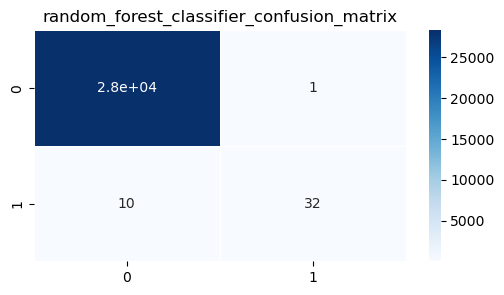

In [59]:
# confusion matrix plot
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,prediction_rm),cmap = "Blues",linewidths=0.5, annot=True)
plt.title("random_forest_classifier_confusion_matrix")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\reports\\figures\\9.0 random_forest_classifier_confusion_matrix.jpg")
plt.show()

In [61]:
# saving the random forest classifier model
import joblib
joblib.dump(rfc,"C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\models\\2.0 random forest classifier.pkl")

['C:\\Users\\yozil\\Desktop\\My projects\\4.0 Fraud_Detection\\models\\2.0 random forest classifier.pkl']

In [56]:
# comparison between logistic regression and random forest classifiers
pd.concat([lrdf,rfdf], axis = 1)

,logistic_regression,random_forest_classifier
accuracy,0.999260,0.999612
precision,0.862069,0.969697
recall,0.595238,0.853333
f1_score,0.704225,0.761905


#### 3. XGBOOST Classifier